In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [13]:
sample = np.random.choice([1,2,3,4,5,6], 100)
sample

array([2, 4, 1, 4, 5, 4, 1, 3, 4, 4, 4, 2, 2, 5, 3, 2, 2, 4, 4, 1, 4, 6, 4,
       6, 4, 6, 5, 5, 1, 1, 1, 5, 3, 4, 2, 2, 4, 5, 5, 1, 4, 4, 4, 3, 3, 3,
       4, 3, 4, 1, 4, 5, 5, 1, 4, 2, 5, 4, 4, 4, 5, 1, 5, 1, 6, 5, 4, 6, 6,
       4, 1, 3, 6, 4, 4, 2, 1, 1, 2, 2, 1, 4, 6, 6, 2, 4, 5, 5, 6, 5, 4, 1,
       3, 5, 6, 6, 1, 5, 4, 6])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [14]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({4: 31, 5: 18, 1: 17, 6: 13, 2: 12, 3: 9})
Вероятности выпадений каждой из сторон:
{1: 0.17, 2: 0.12, 3: 0.09, 4: 0.31, 5: 0.18, 6: 0.13}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [16]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100) 
sample

array([-0.61498056, -1.85859696,  0.41457288, -1.65647472, -0.17001874,
       -0.23884888,  0.68506811,  0.59095462, -2.07401122, -1.13688588,
       -0.58877622, -0.57104799, -0.31947562, -0.31993293,  1.23161756,
       -1.66271758,  0.81745717,  0.13628808, -0.18200595, -1.02725688,
       -0.15208651, -0.50673365,  0.41389414, -0.0239018 , -0.15996447,
       -0.40652438,  1.72775315,  0.0077676 ,  1.04993997,  1.25528456,
       -0.95236399, -1.60659836,  0.14444708, -1.10002644, -1.28893061,
        0.69306782,  0.56772537,  0.92022818,  1.32490113,  1.75512163,
       -0.62508085, -1.46403245, -0.37326262, -0.32114445, -1.08781589,
       -0.29722123,  1.02733371, -1.08337669,  0.09653653, -0.49618439,
        0.11207176, -2.69049598, -0.90191488, -1.70309517,  0.32826611,
        0.08538577, -0.2796406 , -1.49895139,  0.66983531,  0.20304125,
        0.0776954 , -0.46375942, -0.2296704 , -1.30214219, -0.23518477,
        2.14082047, -0.40422307, -1.18671251, -0.75320731, -1.25

Эмпирическая функция распределения для полученной выборки:

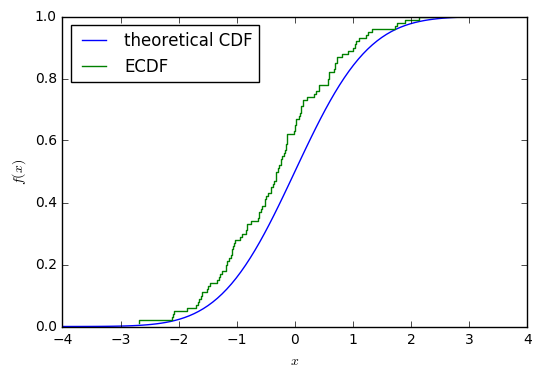

In [17]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

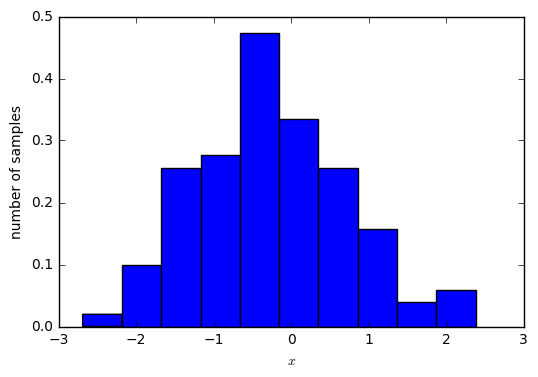

In [18]:
plt.hist(sample, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

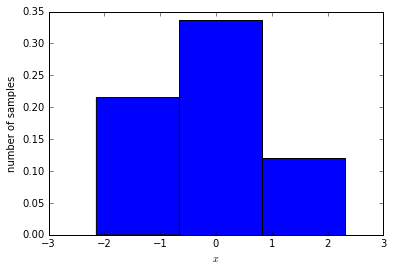

In [7]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

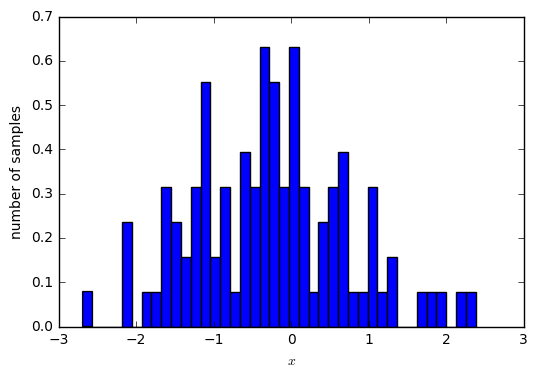

In [19]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

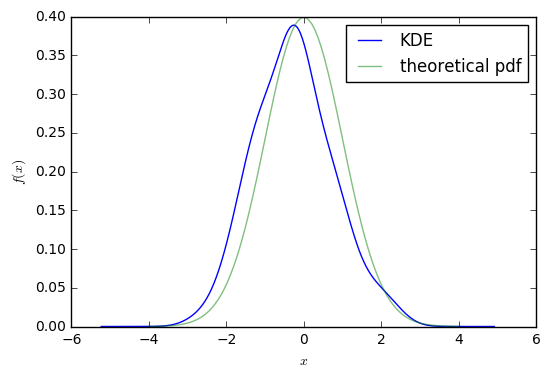

In [20]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')